In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
arch=resnext50

# Checking solution where training set = test set(Just checking!!!)

In [4]:
PATH = "final_data1/user16/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [5]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="train", bs =4)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 16/16 [00:06<00:00,  2.37it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      1.257469   2636.930696 0.546875  



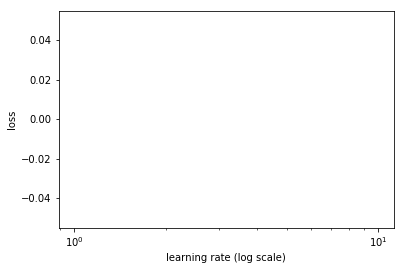

In [7]:
lrf=learn.lr_find()
learn.sched.plot()

In [8]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      1.420808   0.816297   0.640625  
    1      1.840401   0.513019   0.765625        
    2      2.343373   0.321638   0.90625         
    3      2.001867   0.491183   0.828125        
    4      1.547569   0.67028    0.890625        



[array([0.67028]), 0.890625]

In [9]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.908243   0.221192   0.9375    
    1      1.009367   0.238746   0.9375           
    2      0.990788   0.194838   0.9375           
    3      1.029275   0.137391   0.96875          
    4      1.063777   0.104178   0.96875          



[array([0.10418]), 0.96875]

In [11]:
learn.fit(0.001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.688929   0.059251   0.984375  
    1      0.804063   0.065618   0.984375         
    2      0.782112   0.147564   0.953125         
    3      0.669242   0.039234   0.984375         
    4      0.651169   0.150991   0.953125         
    5      0.714892   0.030997   0.984375         
    6      0.744098   0.165513   0.984375         
    7      0.56752    0.040236   0.984375         
    8      0.628826   0.076342   0.96875          
    9      0.622194   0.056741   0.984375         
    10     0.565231   0.057905   0.96875          
    11     0.653928   0.046725   0.984375         
    12     0.633798   0.038821   0.984375         



[array([0.03882]), 0.984375]

In [12]:
log_preds,y = learn.TTA(n_aug=1)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.984375

[[41  0]
 [ 1 22]]


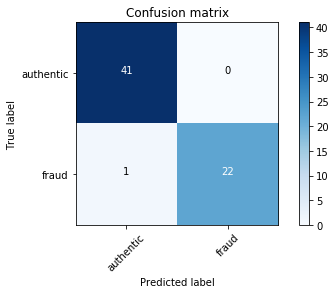

In [13]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

# Real Deal!

In [13]:
PATH = "final_data1/user16/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [14]:
tfms = tfms_from_model(arch, sz=512, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="test", bs =6)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 7/7 [00:01<00:00,  5.80it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      2.64537    546.766329 0.595238  



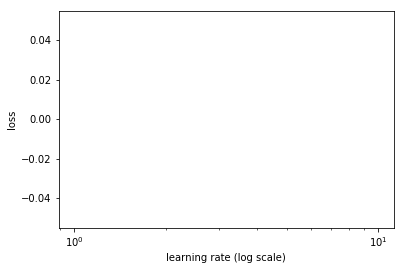

In [15]:
lrf=learn.lr_find()
learn.sched.plot()

In [16]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.900081   0.592597   0.714286  
    1      0.721604   0.295005   0.857143         
    2      0.713932   0.4189     0.809524         
    3      0.638329   0.509436   0.857143         
    4      0.653908   0.295503   0.880952         



[array([0.2955]), 0.8809523837906974]

In [9]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      1.038162   0.790089   0.785714  
    1      0.932713   0.662811   0.738095         
    2      0.816559   0.880969   0.785714         
    3      0.750409   1.102121   0.785714         
    4      0.828424   0.714837   0.738095         



[array([0.71484]), 0.7380952380952381]

In [10]:
learn.fit(0.001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy            
    0      0.792238   0.656408   0.785714  
    1      0.695107   0.621213   0.738095         
    2      0.608184   0.677052   0.761905         
    3      0.688782   0.641262   0.738095         
    4      0.777803   0.670968   0.785714         
    5      0.809346   0.773996   0.761905         
    6      0.801298   0.687188   0.785714         
    7      0.821189   0.780617   0.738095         
    8      0.734035   0.888239   0.738095         
    9      0.629863   0.929282   0.785714         
    10     0.62995    0.857815   0.761905         
    11     0.661308   0.948745   0.738095         
    12     0.636829   0.867716   0.785714         



[array([0.86772]), 0.7857142857142857]

In [11]:
learn.fit(0.001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.564761   0.740897   0.761905  
    1      0.405615   0.767034   0.714286         
    2      0.40163    0.723832   0.738095         
    3      0.539719   0.787006   0.761905         
    4      0.548035   0.835105   0.738095         
    5      0.549394   0.773405   0.761905         
    6      0.482582   0.939496   0.738095         
    7      0.517315   0.834218   0.761905         
    8      0.66973    0.81607    0.690476         
    9      0.71707    0.769795   0.690476         
    10     0.721242   0.830898   0.690476         
    11     0.715306   0.837863   0.690476         
    12     0.662317   0.800675   0.761905         



[array([0.80068]), 0.7619047619047619]

In [61]:
learn.fit(0.0001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.489797   0.938907   0.738095  
    1      1.360645   0.922552   0.690476                 
    2      1.358735   1.60083    0.547619                 
    3      1.467729   1.404455   0.52381                  
    4      1.297622   4.501314   0.642857                 
    5      1.361957   1.018073   0.714286                 
    6      1.464921   0.993343   0.690476                 
    7      1.376429   0.72869    0.738095                 
    8      1.410983   1.198021   0.642857                 
    9      1.423775   1.301543   0.547619                 
    10     1.357291   0.883056   0.642857                 
    11     1.437325   0.886551   0.619048                 
    12     1.342736   0.657891   0.738095                 



[array([0.65789]), 0.7380952380952381]

In [12]:
learn.fit(0.0001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy            
    0      0.697736   0.859607   0.761905  
    1      0.737268   0.840897   0.738095         
    2      0.787803   0.753908   0.714286         
    3      0.771537   0.727061   0.666667         
    4      0.674529   0.86832    0.690476         



[array([0.86832]), 0.6904761904761905]

In [60]:
learn.unfreeze()
lr = 0.001
lrs=np.array([lr/100,lr/10,lr])
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      2.18752    2.484843   0.666667  
    1      1.878218   4.014041   0.642857                 
    2      1.936171   2.169946   0.642857                 
    3      1.632982   3.118688   0.666667                 
    4      1.613066   2.4438     0.642857                 
    5      1.672428   1.0878     0.761905                 
    6      1.498536   1.353841   0.619048                 
    7      1.503806   1.212521   0.690476                 
    8      1.592959   1.792053   0.690476                 
    9      1.418921   1.062909   0.738095                 
    10     1.349377   0.693212   0.761905                 
    11     1.45655    0.806926   0.785714                 
    12     1.496857   0.828966   0.761905                 



[array([0.82897]), 0.7619047619047619]

In [17]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.8809523809523809

[[23  4]
 [ 1 14]]


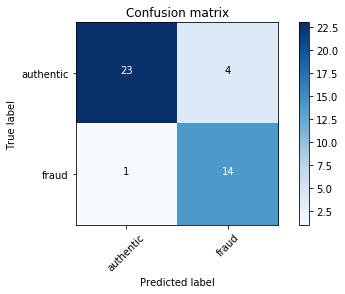

In [18]:
preds = np.argmax(probs, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [19]:
def accuracy_new(preds, targs, thres=0.5):
    preds = [int(x[1] > thres) for x in preds]
    return (preds==targs).mean()

In [20]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
for cut in [0.4, 0.6, 0.65, 0.7]:
    print(accuracy_new(probs, y, cut))

0.8809523809523809                   
0.9047619047619048
0.9047619047619048
0.9047619047619048


[[24  3]
 [ 1 14]]


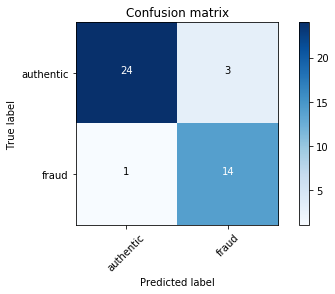

In [21]:
preds = [int(x[1] > 0.6) for x in probs]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)